# **スペインの保険データ**
Source: https://data.mendeley.com/datasets/vfchtm5y7j/1

## 1.0 概要
スペインの保険会社の実データであり、自動車保険と住宅保険の双方を契約する40,284人の個人保険契約者の5年間の追跡データ（一部の顧客は保険契約を更新しないため、5年間分のサンプルがないものもある）。各顧客の情報、契約内容、契約の種類ごとの年間クレーム額（ユーロ）が記録されている。自動車保険では、クレーム額は過失分のみが考慮されている。

論文: https://www.sciencedirect.com/science/article/pii/S0957417421009581


## 2.0 特徴量の説明

- PolID: 顧客ID
- year: 観察年
- gender: 1=男性 0=女性
- Age_client: 契約者の年齢
- age_of_car_M: 自動車を購入してからの経過年数
- Car_power_M: 自動車の「power」
- Car_2ndDriver_M: 1=第二の運転者がいることを保険会社に通知済み 0=それ以外
- num_policiesC: 当保険会社における当契約者の契約件数
- metro_code: 1=都市 0=田舎（rural）
- Policy_PaymentMethodA: 1=保険料年払い 0=保険料月払い　（自動車保険）
- Policy_PaymentMethodH: 1=保険料年払い 0=保険料月払い　（住宅保険）
- Insuredcapital_content_re: 家財の保険価額（住宅保険）
- Insuredcapital_continent_re: 建物の保険価額（住宅保険）
- appartment: 1=アパートメント 0:その他
- Client_Seniority: 当契約者が当保険会社と契約してからの年数
- Retention: 1=更新契約 0=その他の契約
- NClaims1: 当年における合計クレーム数（自動車保険）
- NClaims2: 当年における合計クレーム数（住宅保険）
- Claims1: 当年における合計クレーム額（自動車保険）
- Claims2: 当年における合計クレーム額（住宅保険）
- Types: 当年において、1=自動車保険・住宅保険ともにクレームなしの場合, 2=自動車保険はクレームありで住宅保険はクレームなしの場合, 3=住宅保険はクレームありで自動車保険はクレームなしの場合, 4:自動車保険・住宅保険ともにクレームありの場合

## 3.0 データの事前処理

In [49]:
library(skimr)
library(ggplot2)
library(psych)
library(dplyr)
library(gridExtra)
options(warn=-1, message=-1)

In [50]:
dir_home <- "/Users/nkato/Documents/Waseda/sonpo-pricing-2023"
setwd(dir_home)

### (1) 元データ

In [51]:
df <- read.csv('./dataset/data_ex.csv')

In [52]:
# Age_client、age_of_car_M、Client_Seniority についてはPolIDが同一であれば同一の値が記録されている。
# 記録されている値を year=1 における値とみなし、yearごとの値に事前に変換する。
df[, c("Age_client", "age_of_car_M", "Client_Seniority")] <- df[, c("Age_client", "age_of_car_M", "Client_Seniority")] + df[, "year"] - 1

In [53]:
# 1年あたり複数回クレームがある場合、個々のクレームの記録がないため、平均値をクレーム単価として記入する
df <- df %>% mutate(average_Claims1 = ifelse(NClaims1>0, Claims1/NClaims1, 0))
df <- df %>% mutate(average_Claims2 = ifelse(NClaims2>0, Claims2/NClaims2, 0))

### (2) 自動車保険用データの抽出

In [54]:
columns_for_auto <- c(
    "PolID",
    "year",
    "gender",
    "Age_client",
    "Policy_PaymentMethodA",
    "Client_Seniority",
    "Retention",
    "age_of_car_M",
    "Car_power_M",
    "Car_2ndDriver_M",
    "metro_code",
    "NClaims1",
    "Claims1",
    "average_Claims1"
)
df <- df[, columns_for_auto]
write.csv(df, './dataset/auto_processed.csv', row.names=F)

In [55]:
str(df)

'data.frame':	122935 obs. of  14 variables:
 $ PolID                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ year                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ gender               : int  1 1 1 1 1 0 1 1 1 1 ...
 $ Age_client           : num  84 83 85 85 82 79 79 85 78 82 ...
 $ Policy_PaymentMethodA: int  0 1 1 1 1 0 1 0 1 1 ...
 $ Client_Seniority     : num  17 16.8 18.6 20.5 7.9 ...
 $ Retention            : int  1 1 1 1 1 1 0 1 1 0 ...
 $ age_of_car_M         : num  13 0 0 0 20 8 10 10 8 6 ...
 $ Car_power_M          : num  90 177 163 90 115 75 200 70 115 105 ...
 $ Car_2ndDriver_M      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ metro_code           : int  0 0 0 0 0 1 0 0 1 0 ...
 $ NClaims1             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Claims1              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ average_Claims1      : num  0 0 0 0 0 0 0 0 0 0 ...


## 4.0 EDA

In [56]:
skim(df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             122935
Number of columns          14    
_______________________          
Column type frequency:           
  numeric                  14    
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable         n_missing complete_rate       mean        sd    p0
 1 PolID                         0             1 20079.     11729.     1   
 2 year                          0             1     2.46       1.35   1   
 3 gender                        0             1     0.778      0.415  0   
 4 Age_client                    0             1    61.1       13.1   18   
 5 Policy_PaymentMethodA         0             1     0.771      0.420  0   
 6 Client_Seniority              0             1    11.7        5.30   5.00
 7 Retention                     0     

In [57]:
# pair plot
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res = 300)
pairs.panels(df)

In [74]:
# visualize column_y and its exposure by column_x
visualize_barplot <- function(df, column_y, column_x){
    # summarize df by column_x
    df2 <- df %>%
      select({{column_x}}, {{column_y}}) %>%
      group_by_at({{column_x}}) %>%
      summarize(freq=mean(.data[[column_y]])) #, total=n())
    # plotting
    p_freq <- df2 %>%
      ggplot(aes(x = .data[[column_x]])) +
      geom_line(mapping = aes(y = freq)) +
      ylim(0, max(df2$freq)) +
      labs(x=column_x, y=paste("mean", column_y))
    p_total <- df %>%
      ggplot(aes(x = .data[[column_x]])) +
      #geom_col(mapping = aes(y = total)) +
      geom_histogram(bins=100) +
      labs(x=column_x, y="total exposure")
    #grid.arrange(p_freq, p_total, nrow=2, top=paste(column_x, "vs", column_y))
    return(list("freq" = p_freq, "exposure" = p_total))
    }

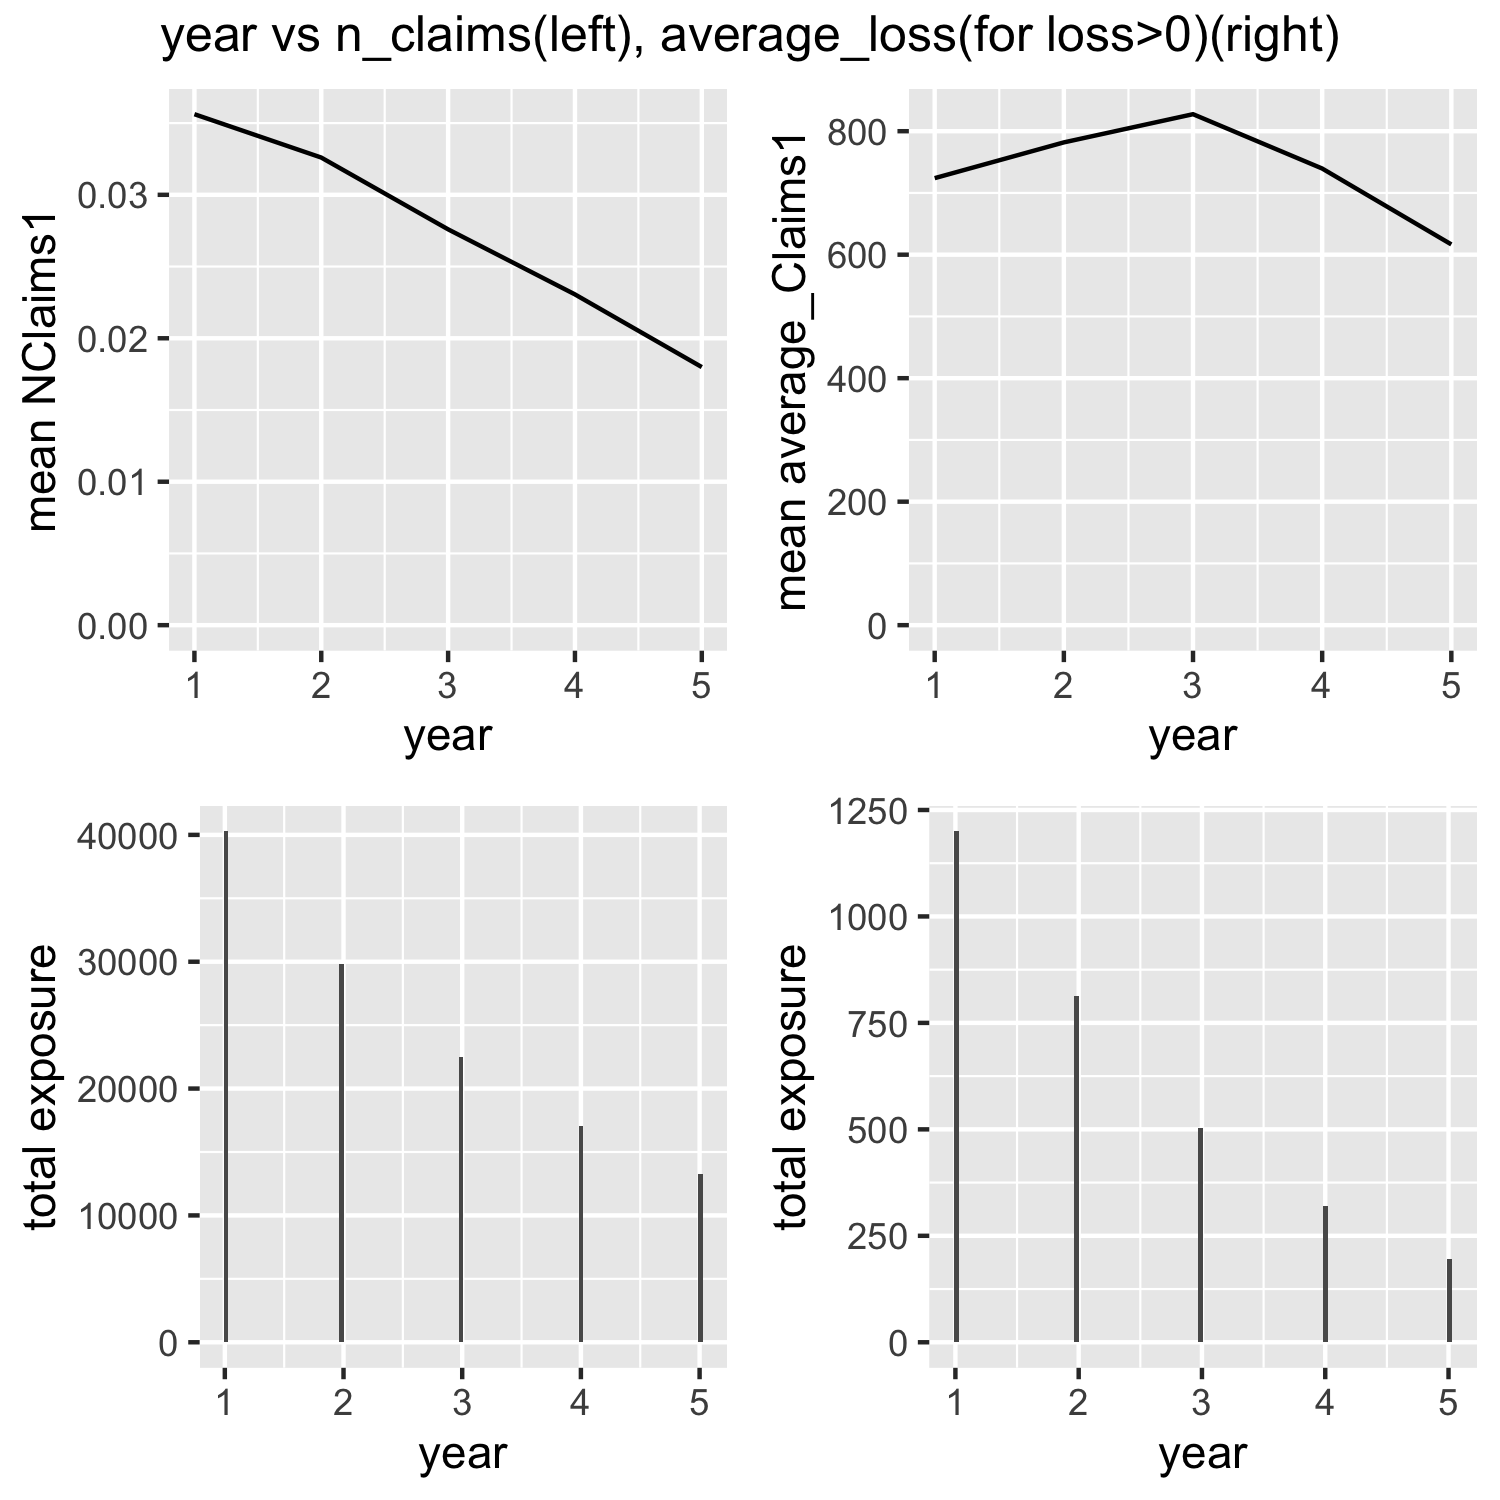

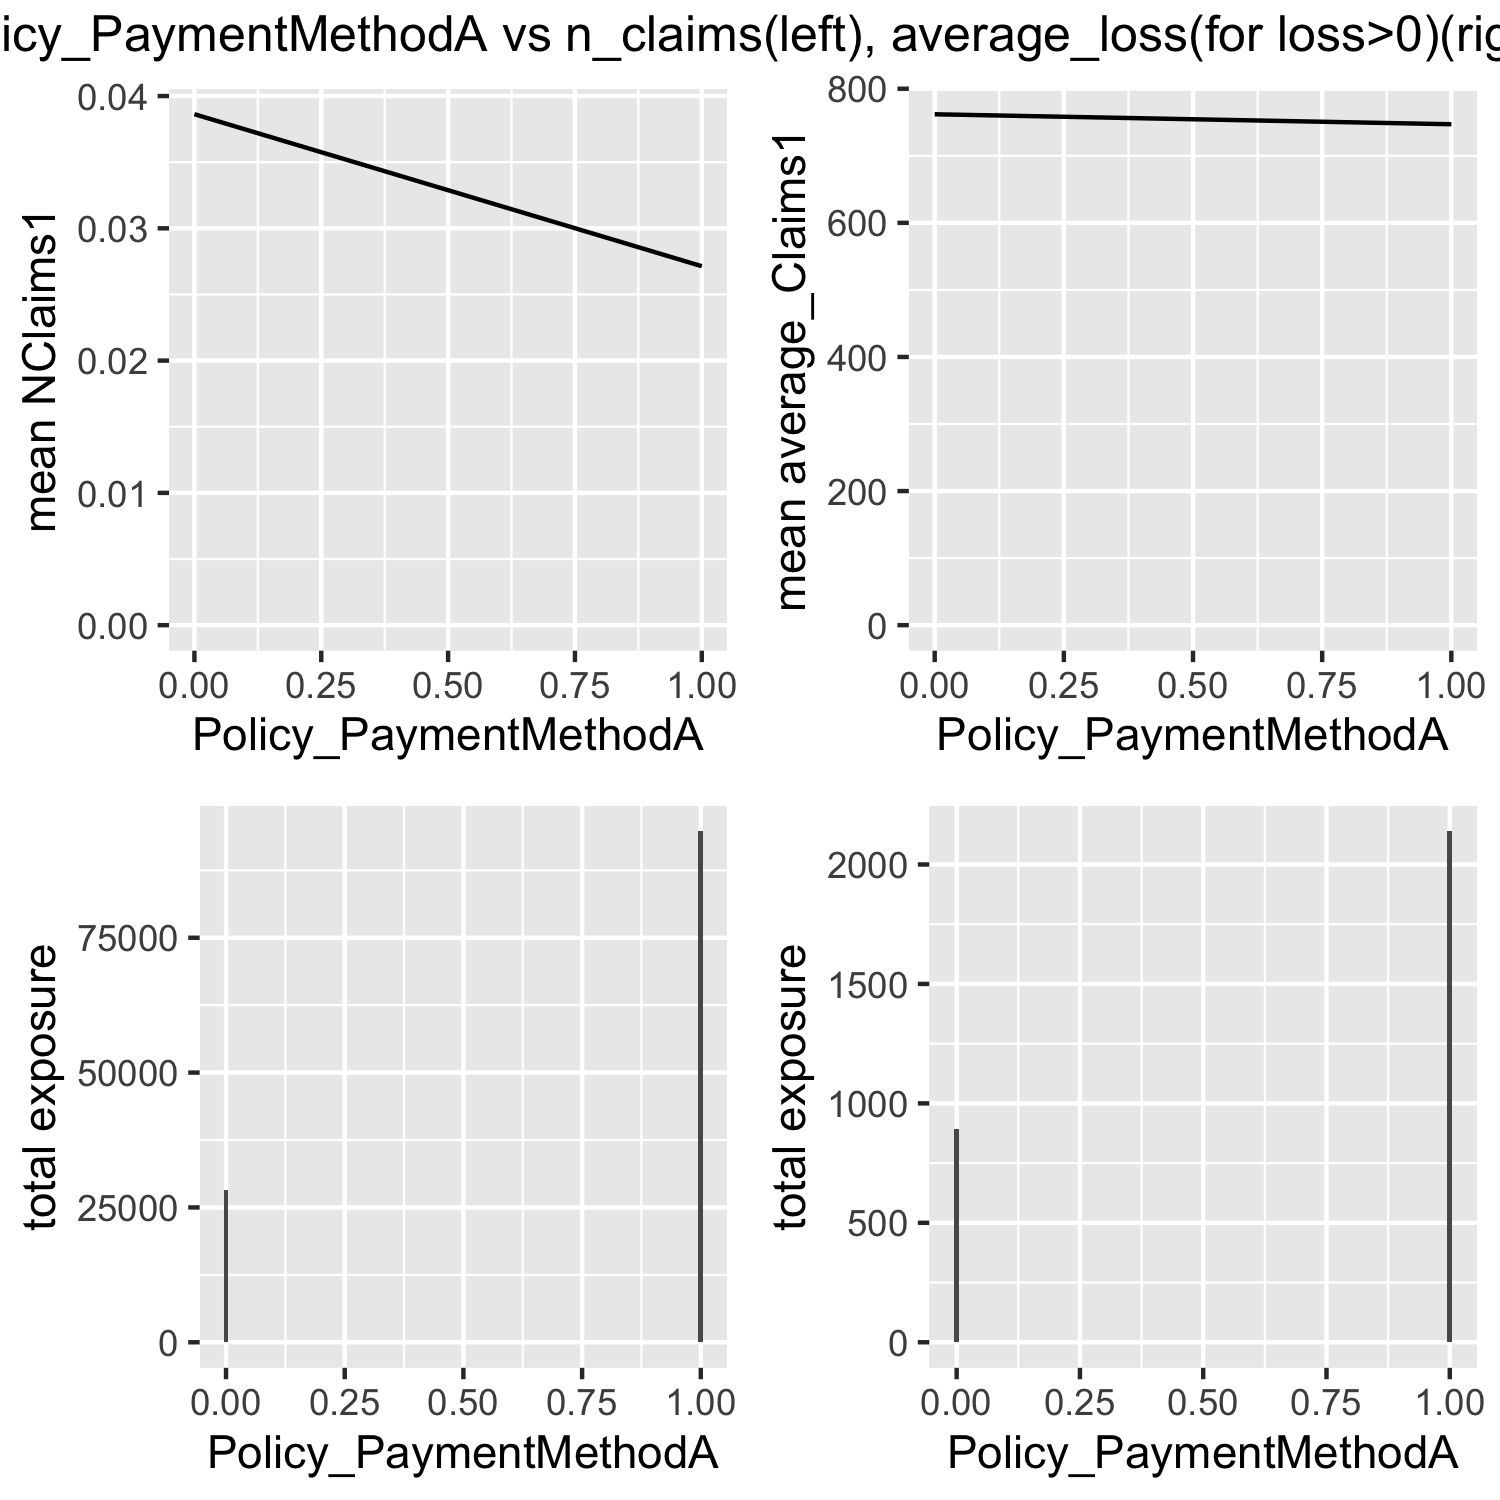

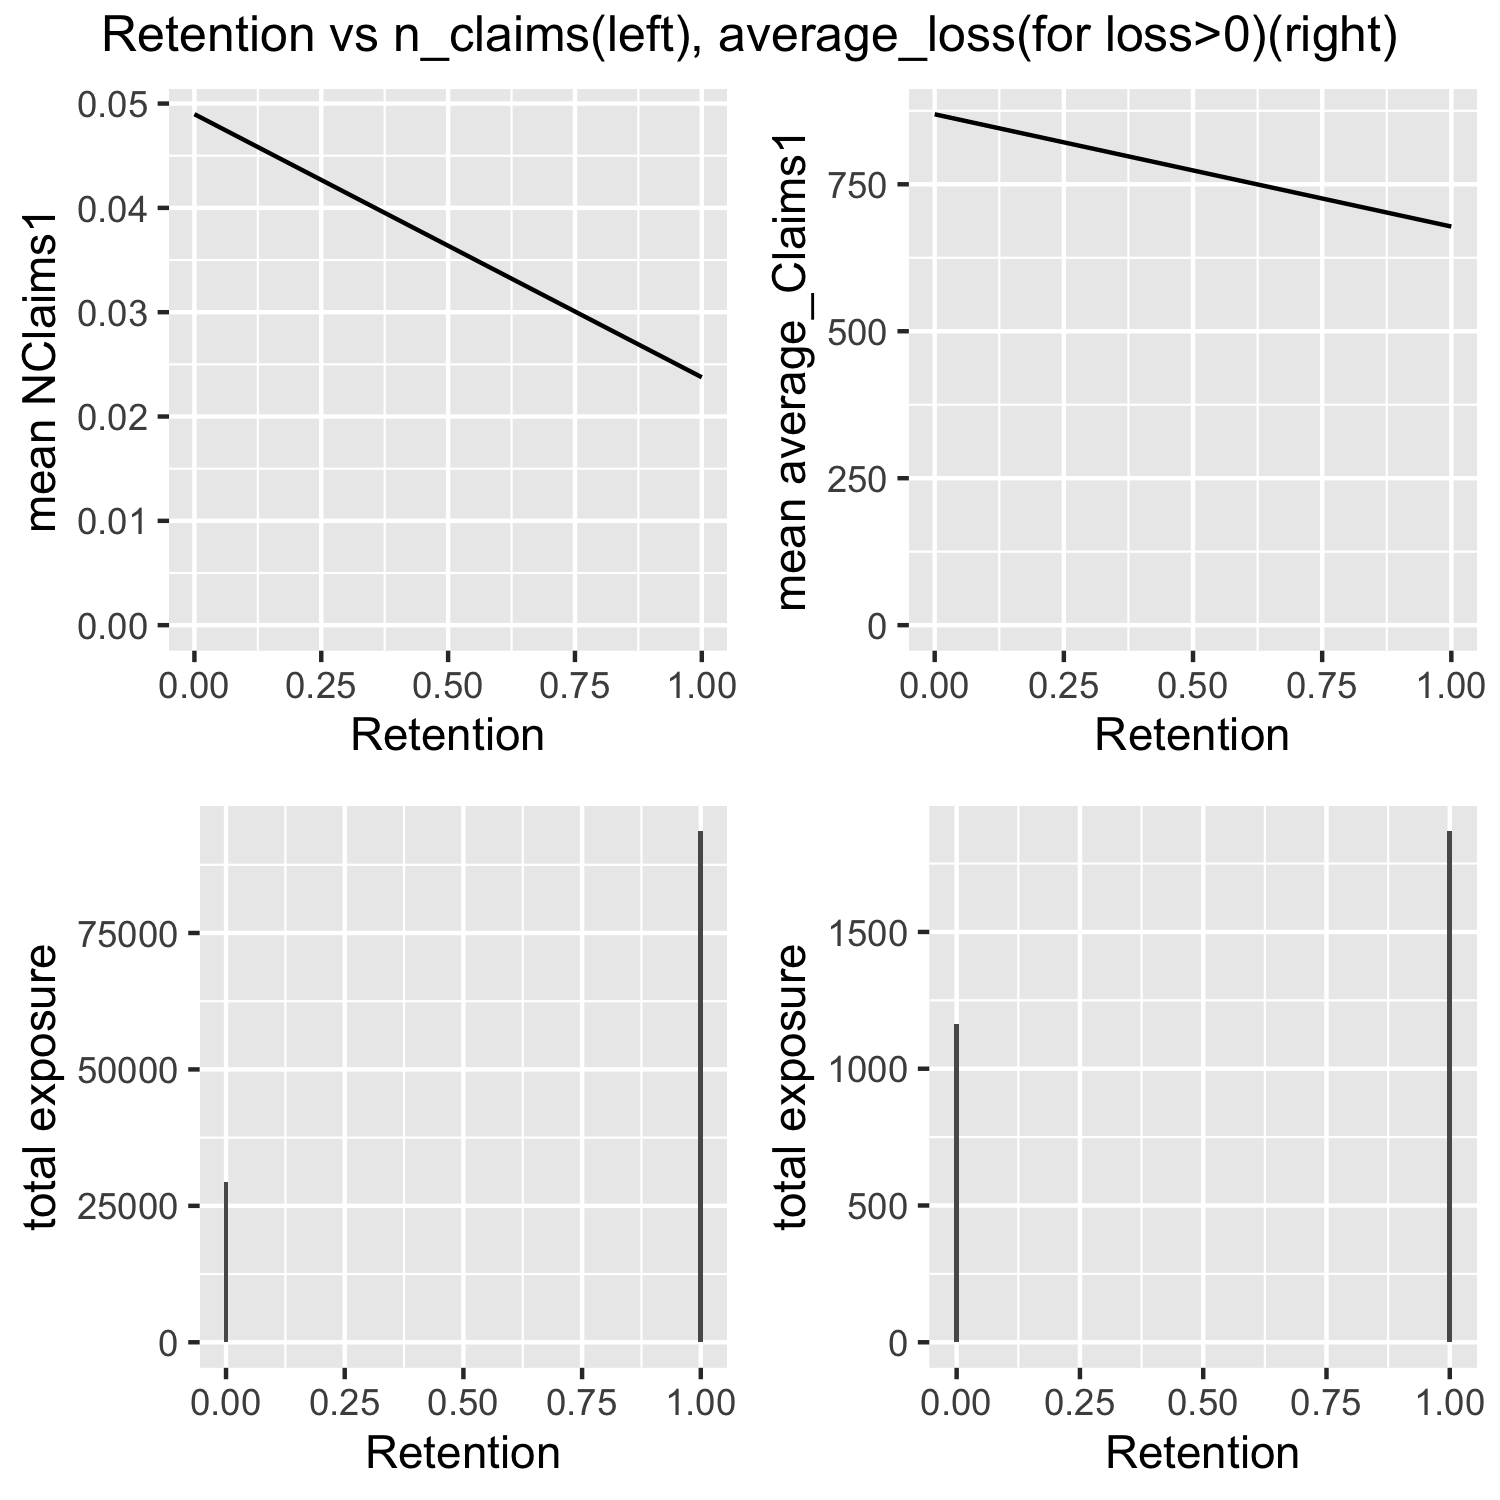

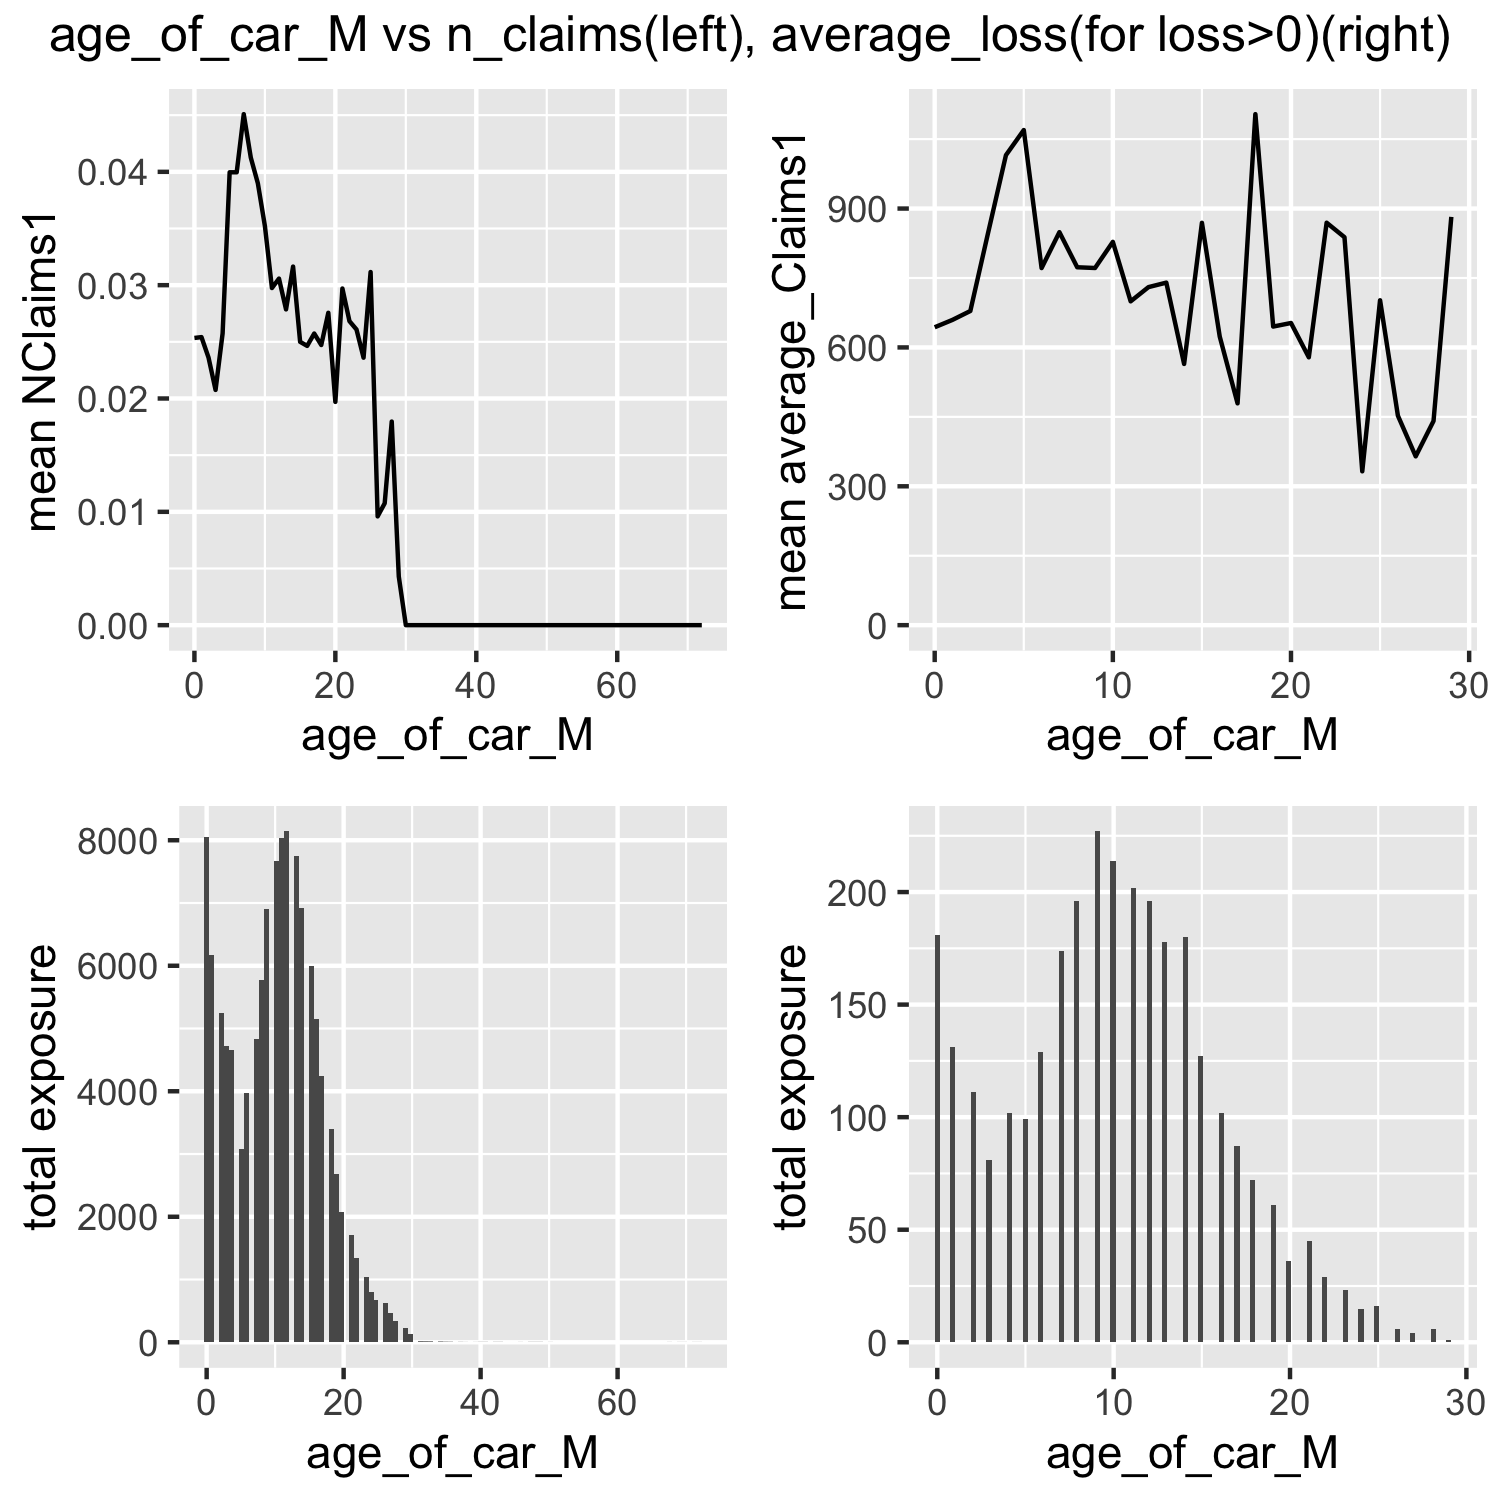

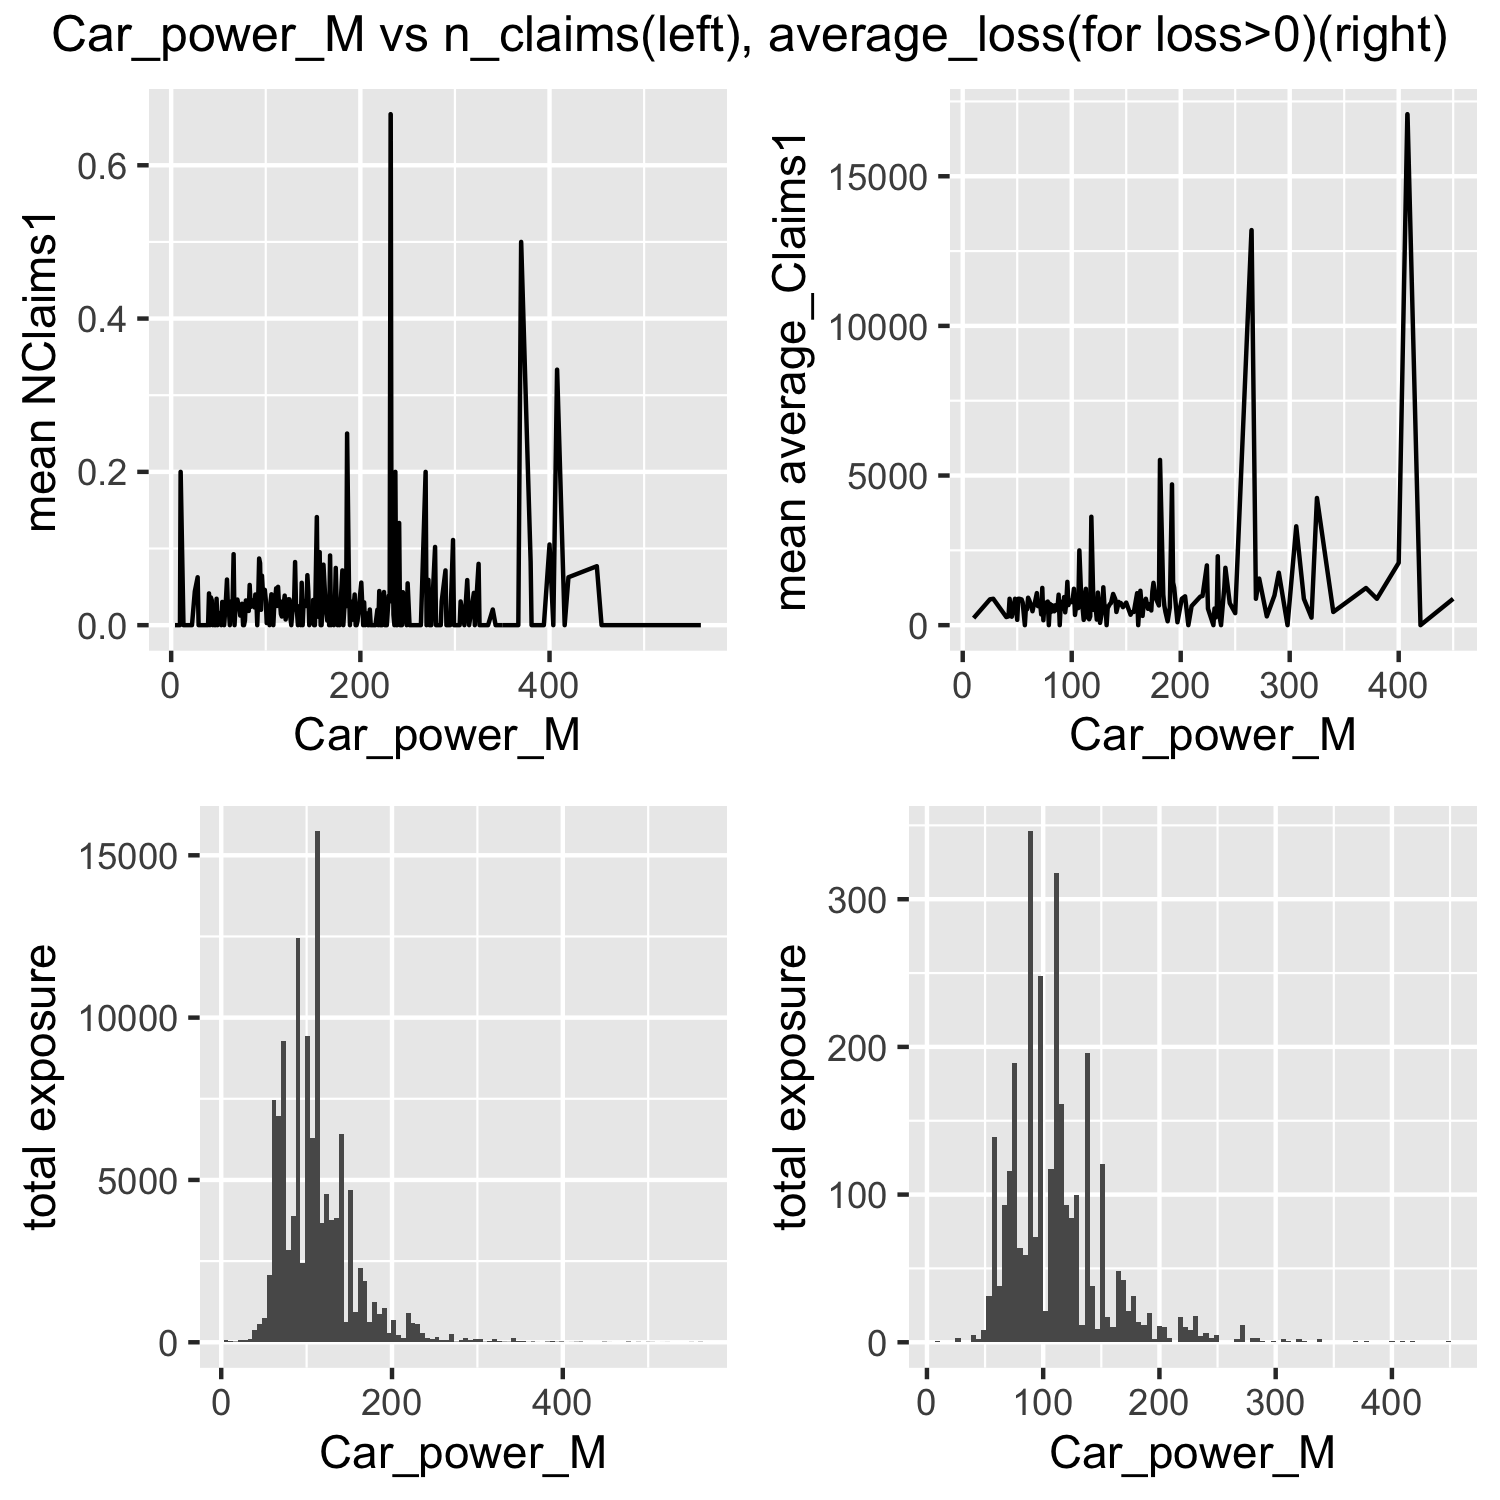

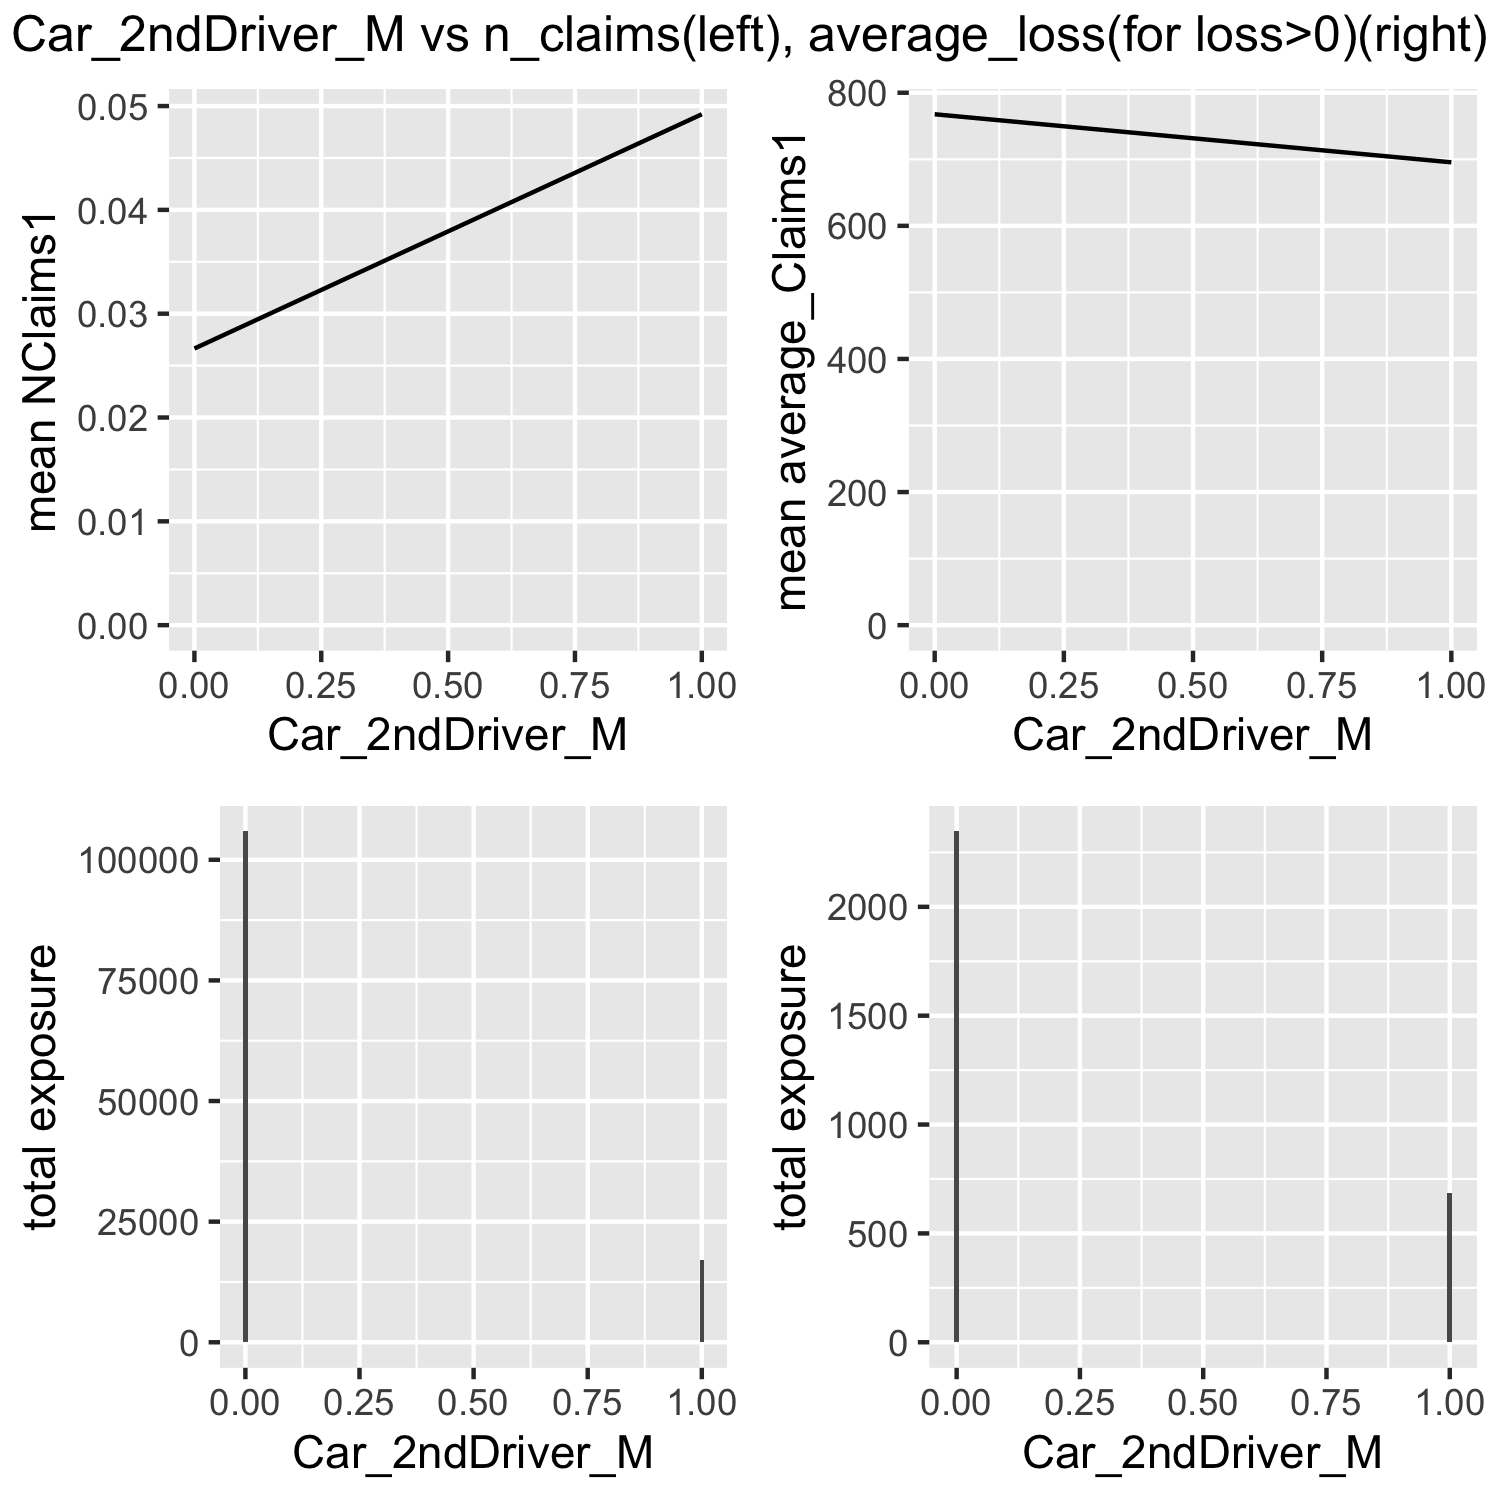

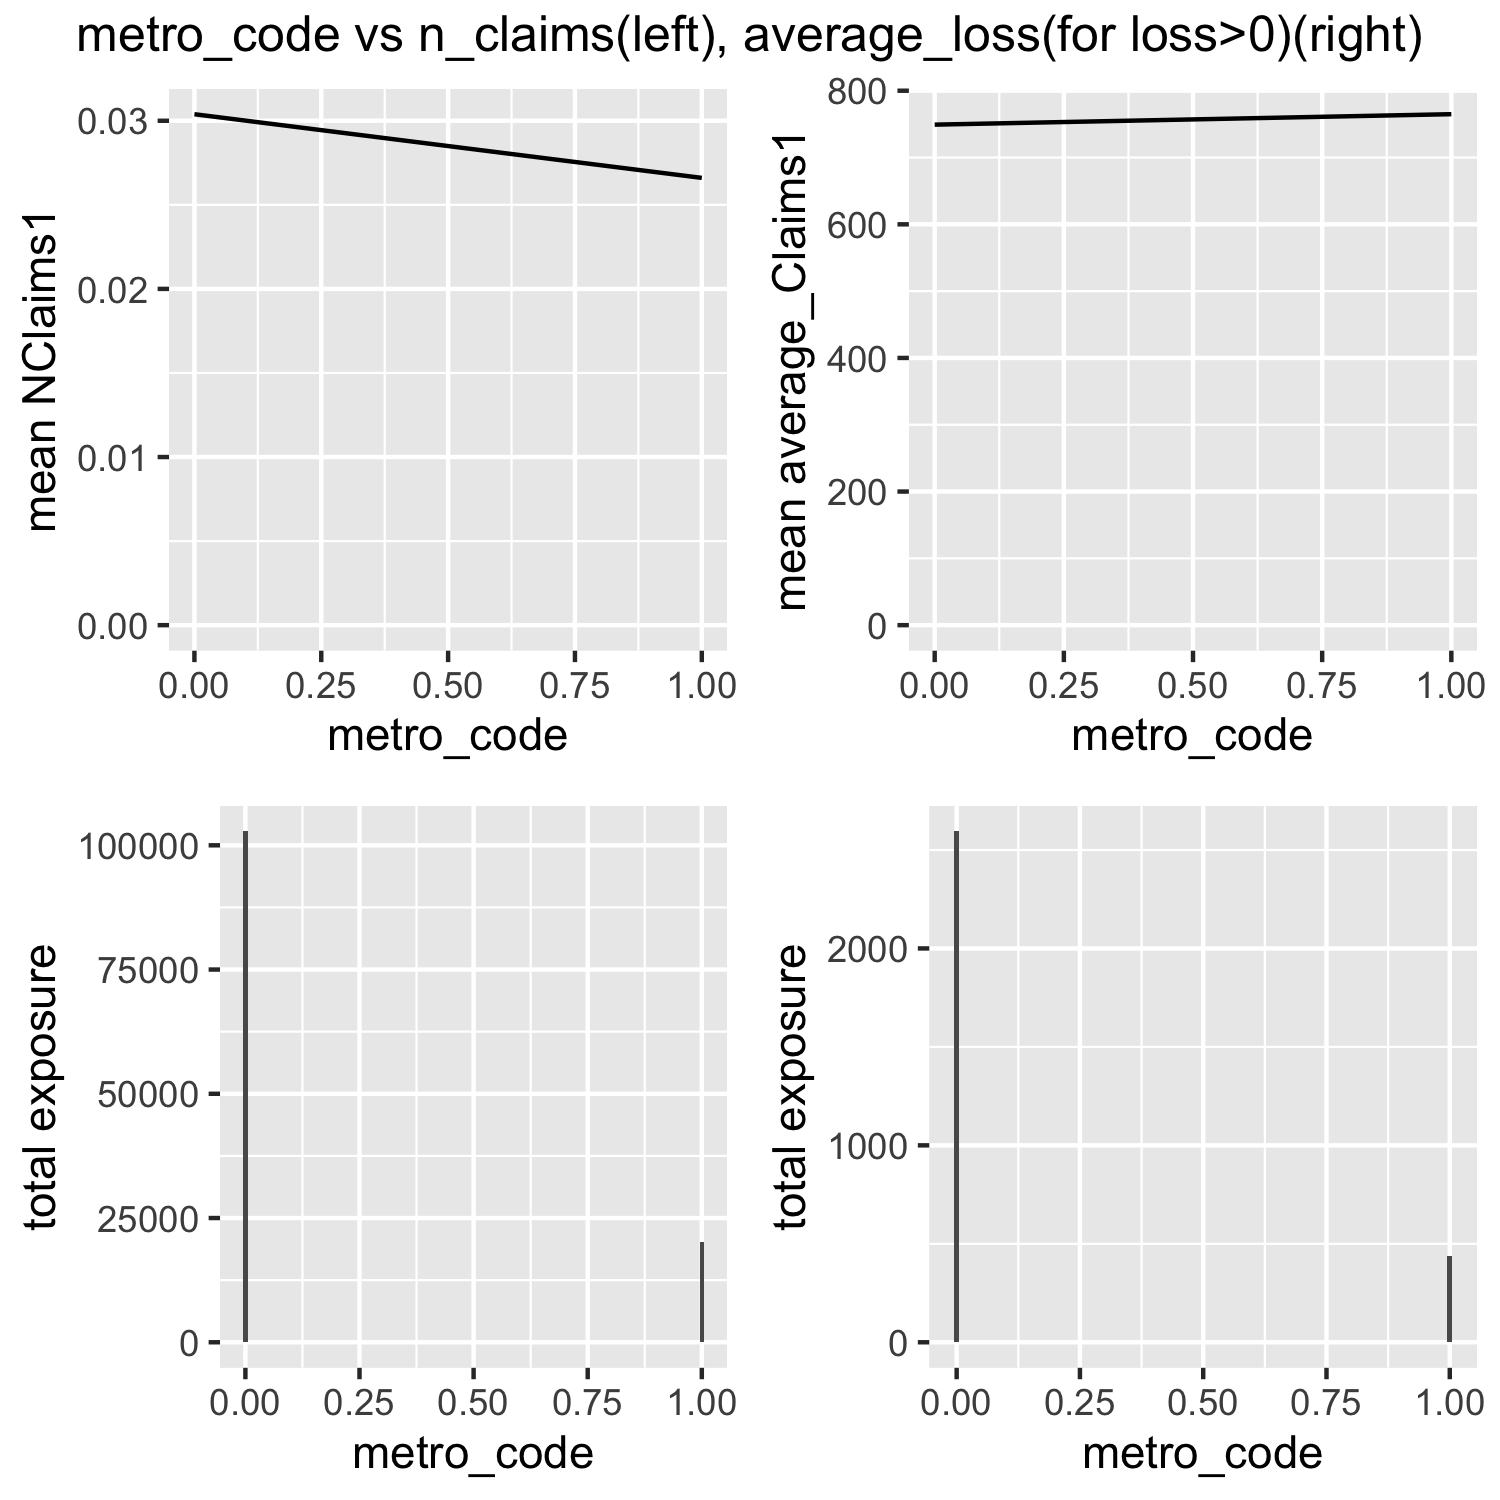

In [75]:
options(repr.plot.width=5, repr.plot.height=5, repr.plot.res = 300)
x <- c(
    "year",
    "gender",
    "Age_client",
    "Policy_PaymentMethodA",
    "Client_Seniority",
    "Retention",
    "age_of_car_M",
    "Car_power_M",
    "Car_2ndDriver_M",
    "metro_code"
)
for (column_name in x){
    p_n_claims <- visualize_barplot(df, "NClaims1", column_name)
    p_average_loss <- visualize_barplot(df[df$NClaims1>0, ], column_y="average_Claims1", column_x=column_name)
    grid.arrange(p_n_claims[["freq"]], p_average_loss[["freq"]],
                 p_n_claims[["exposure"]], p_average_loss[["exposure"]],
                 nrow=2, ncol=2, top=paste(column_name, "vs n_claims(left), average_loss(for loss>0)(right)"))
    }

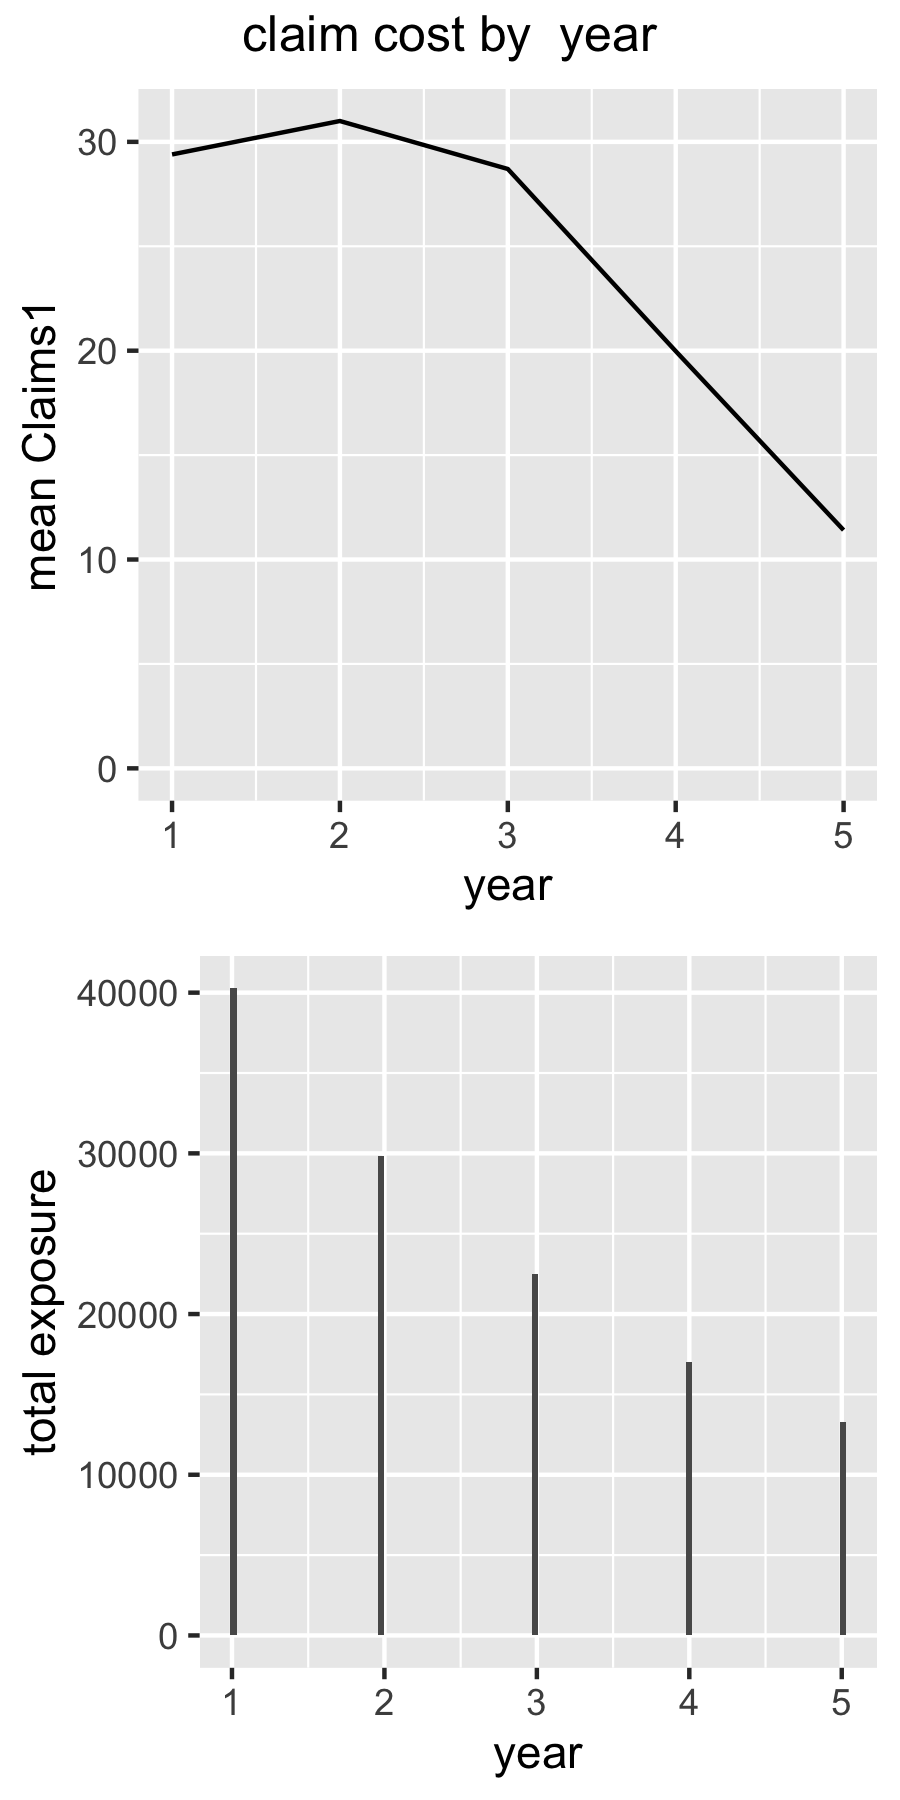

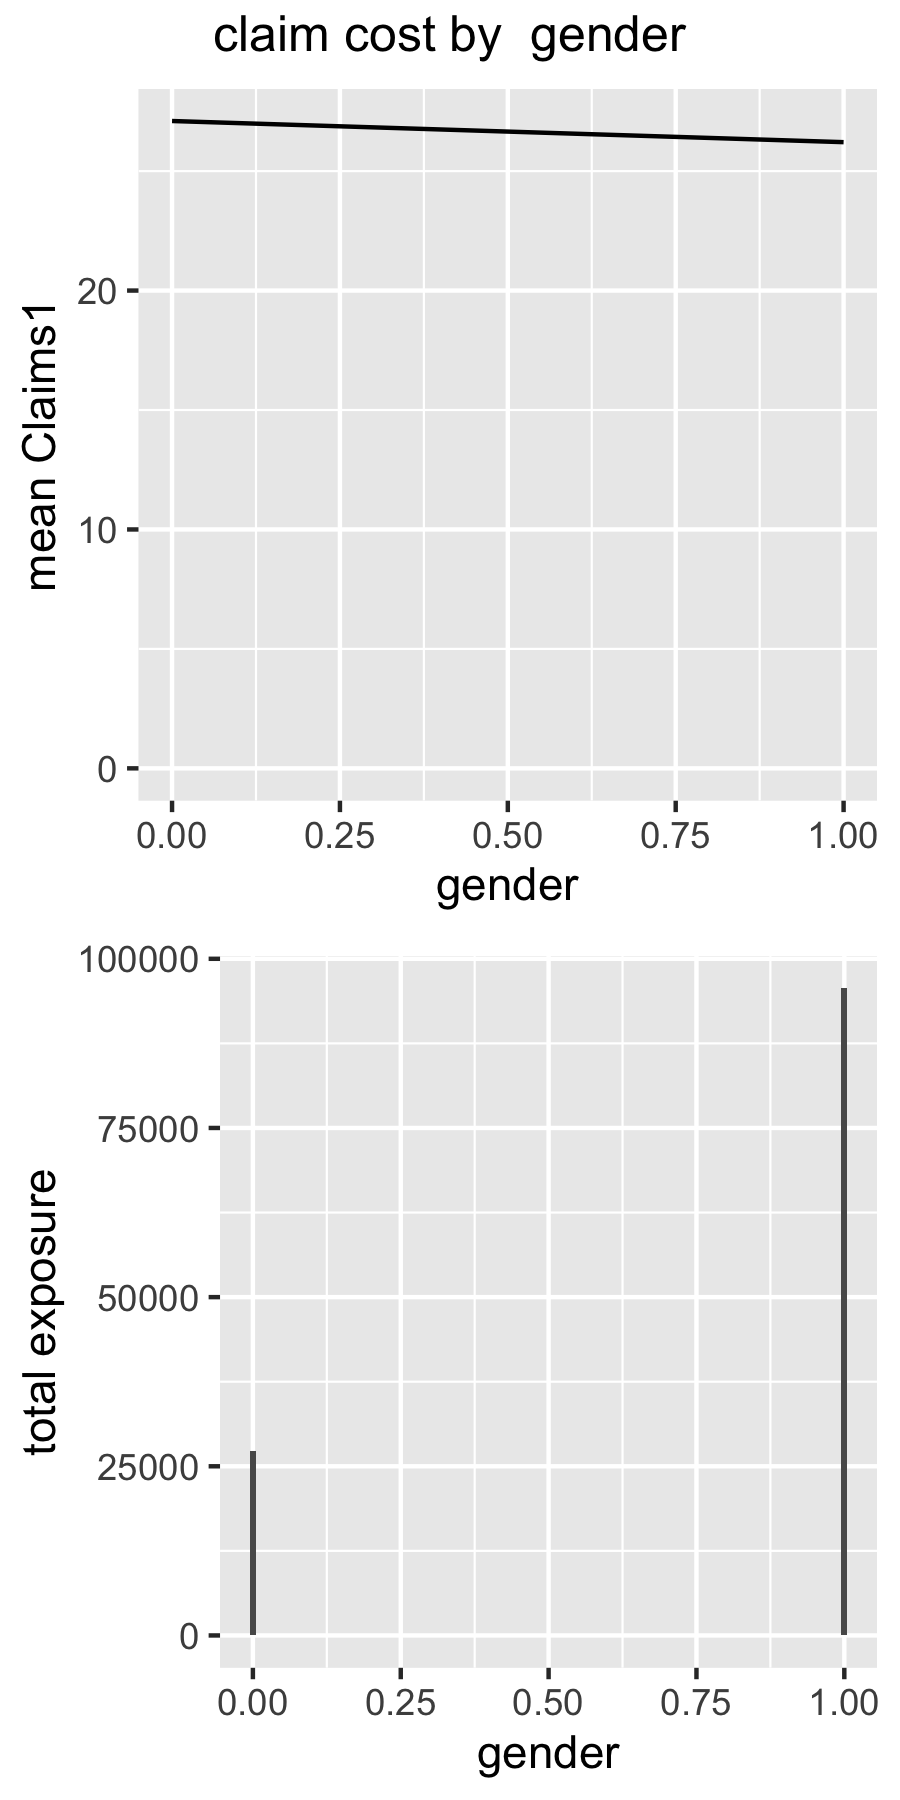

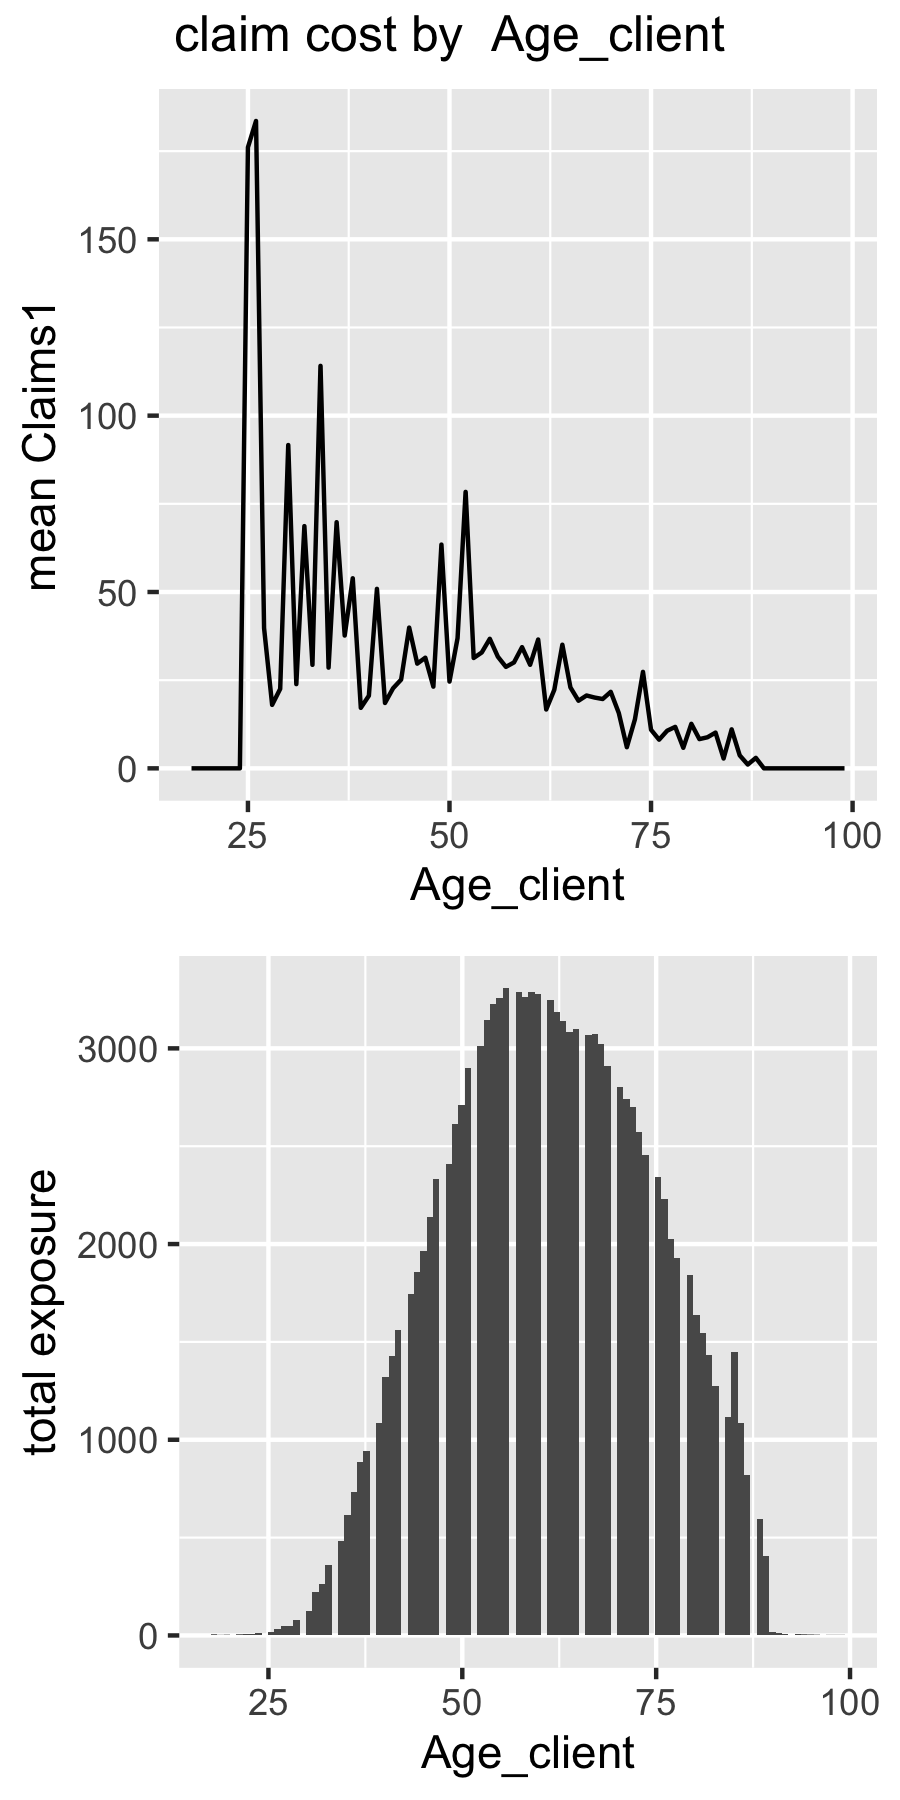

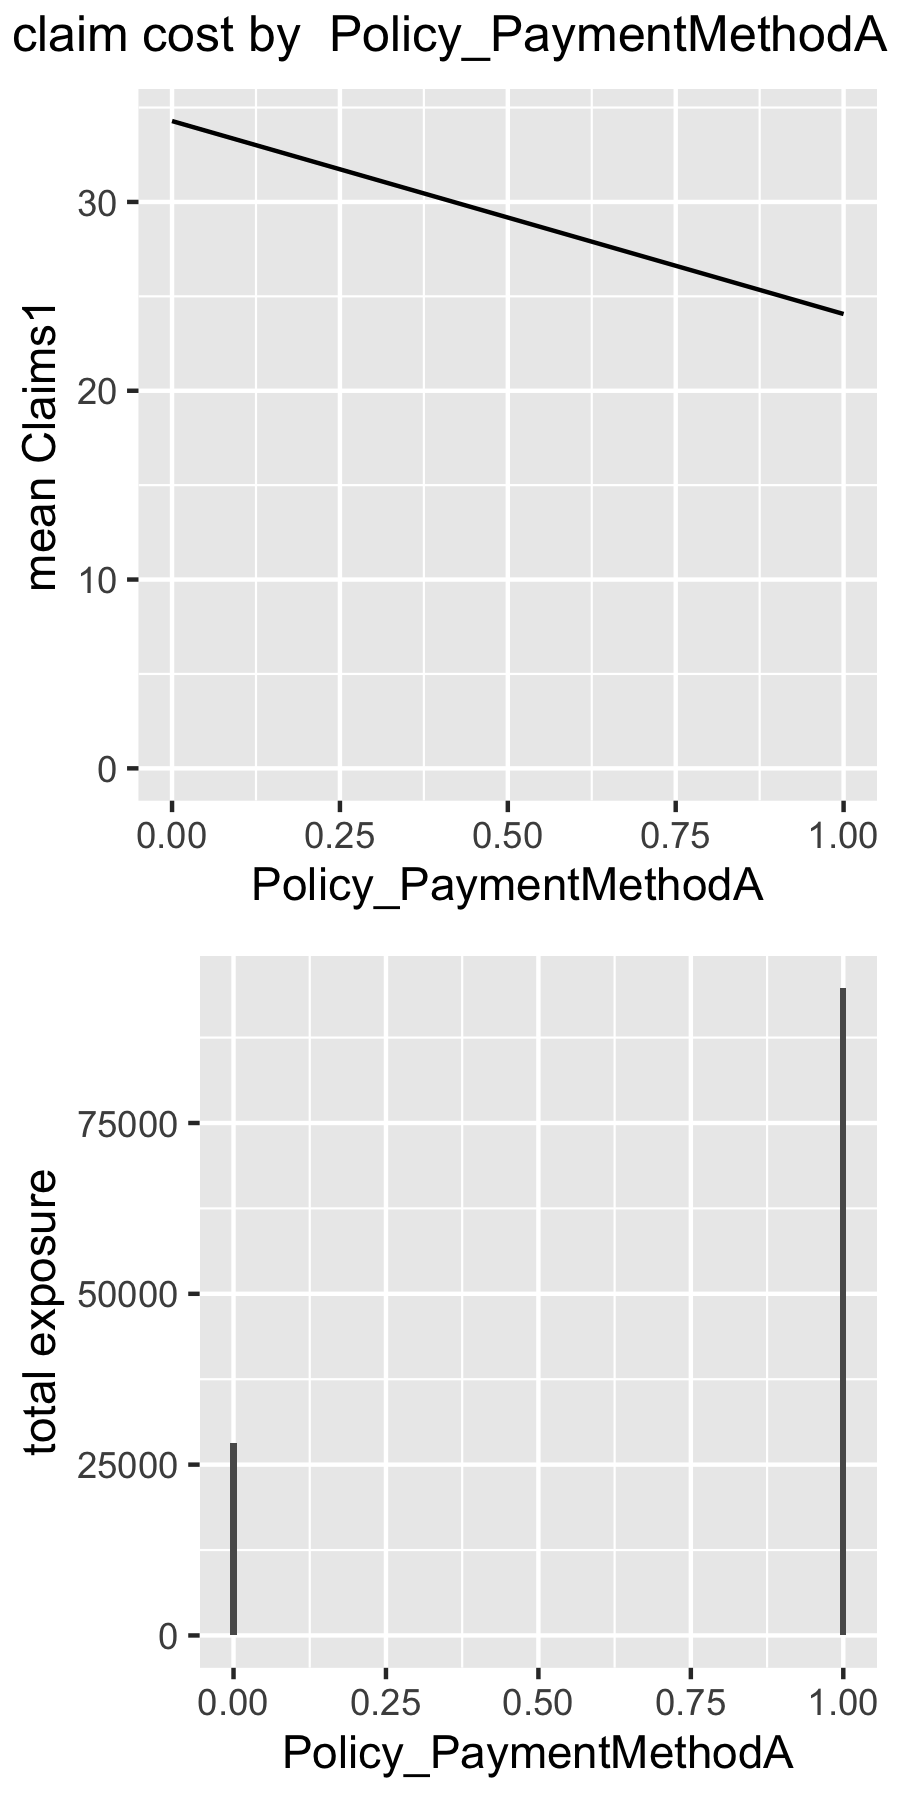

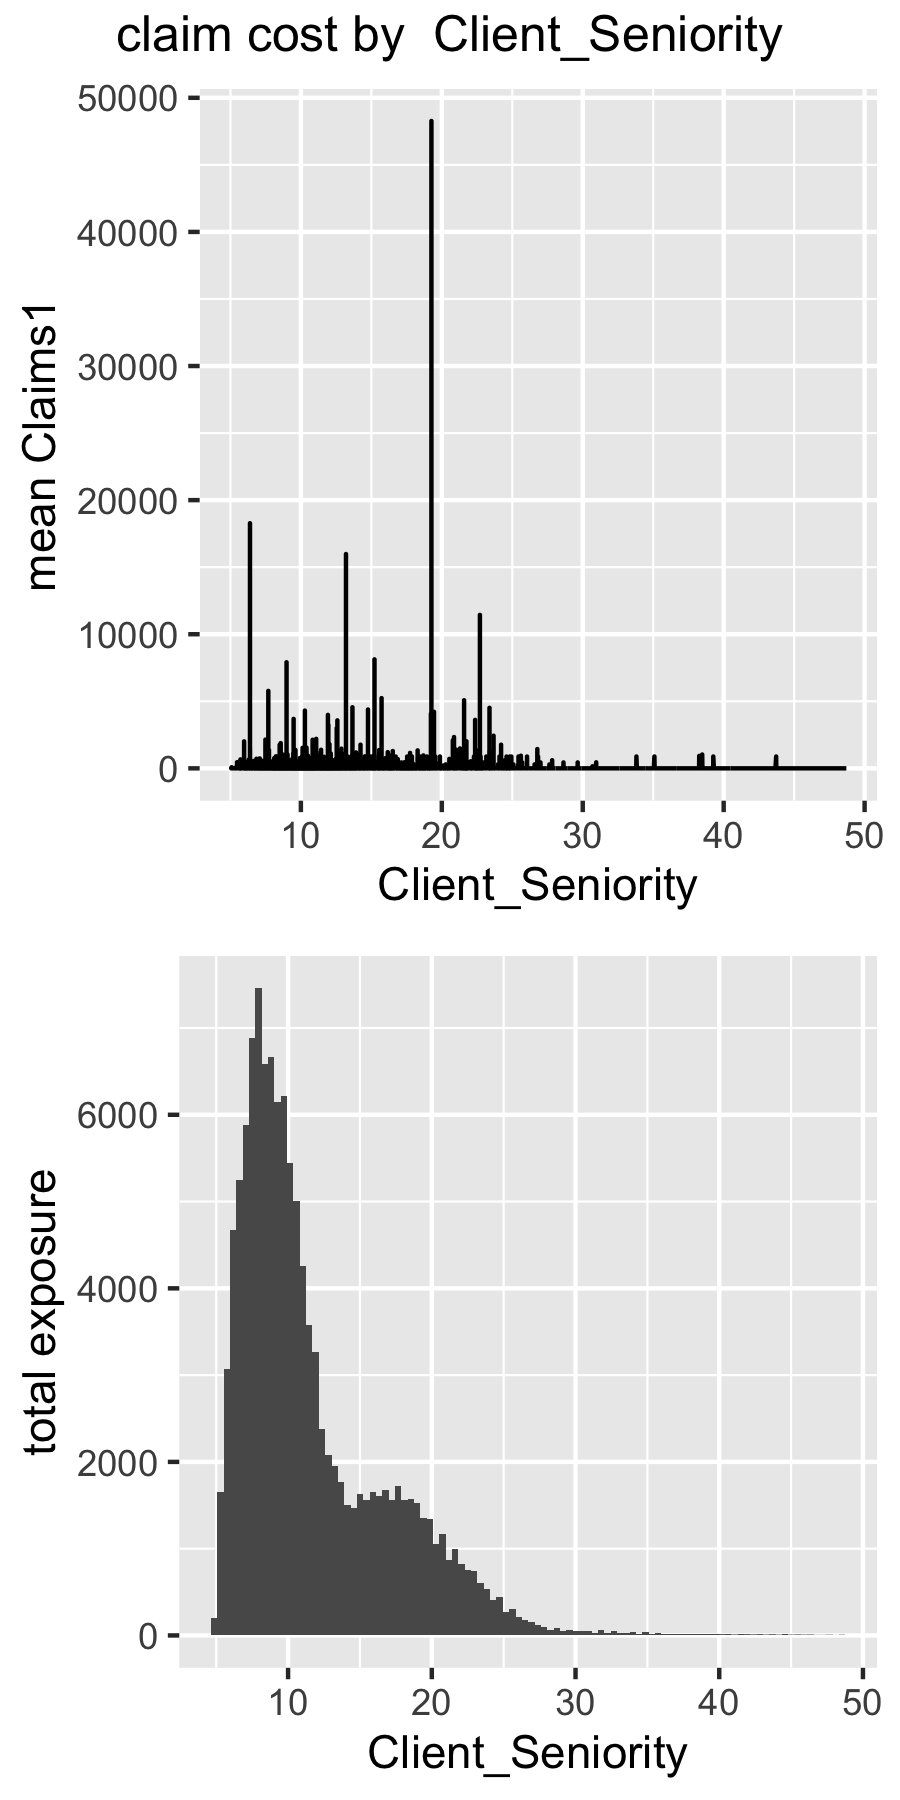

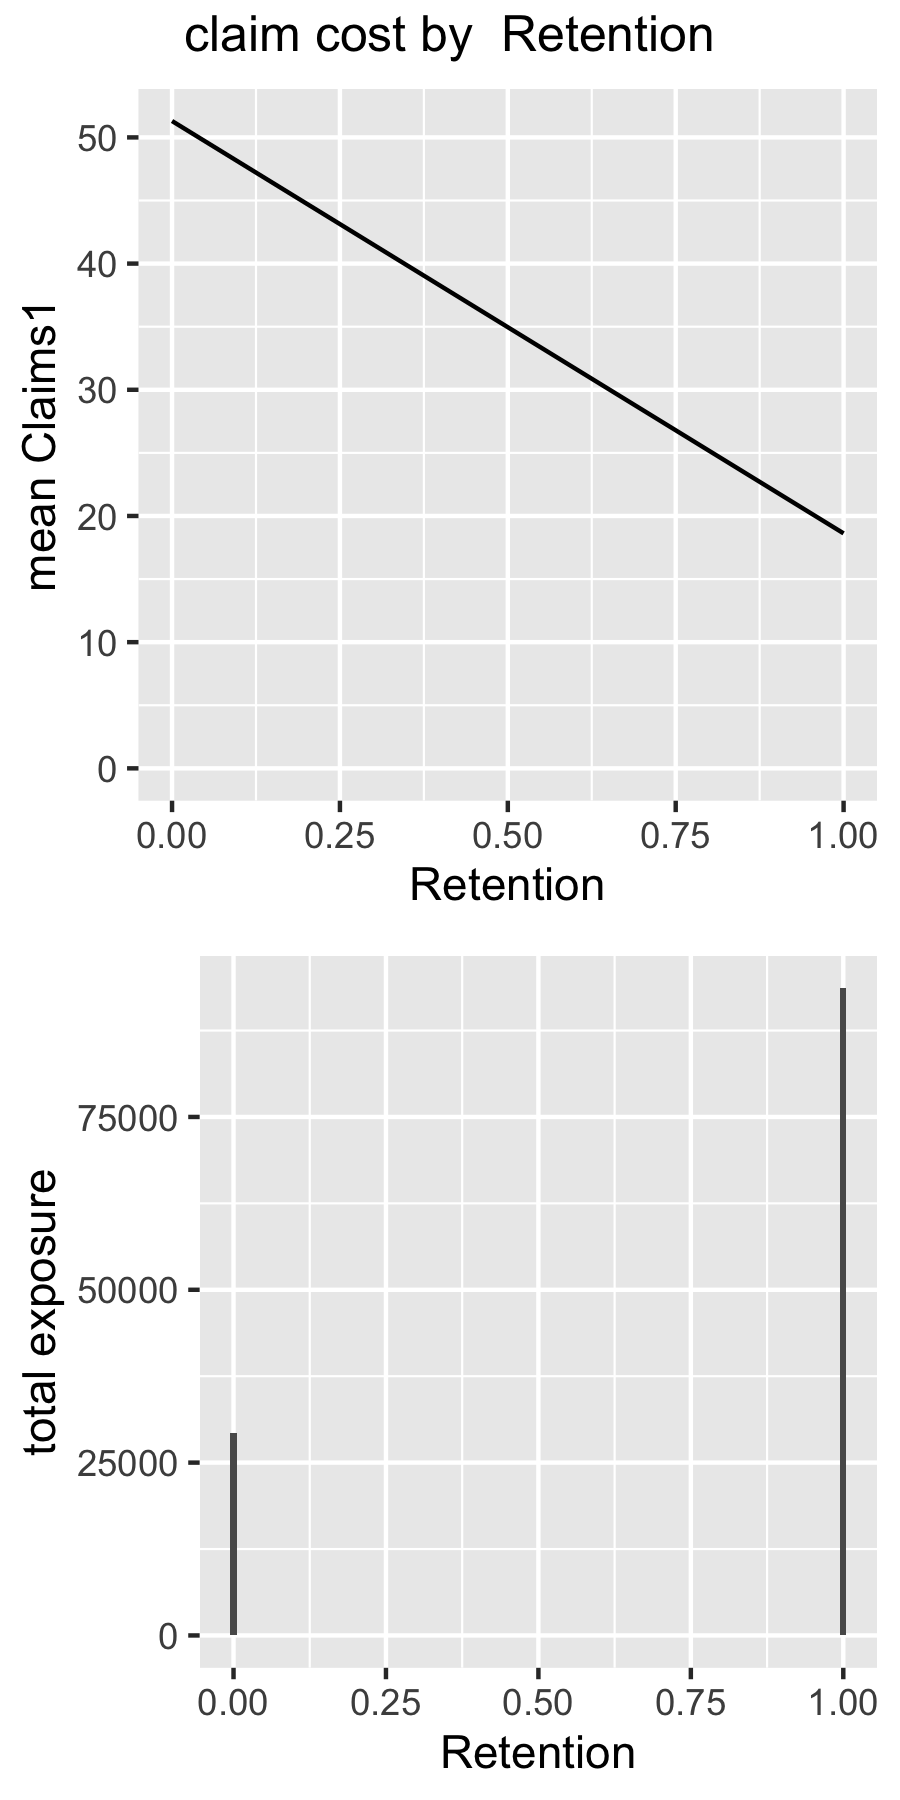

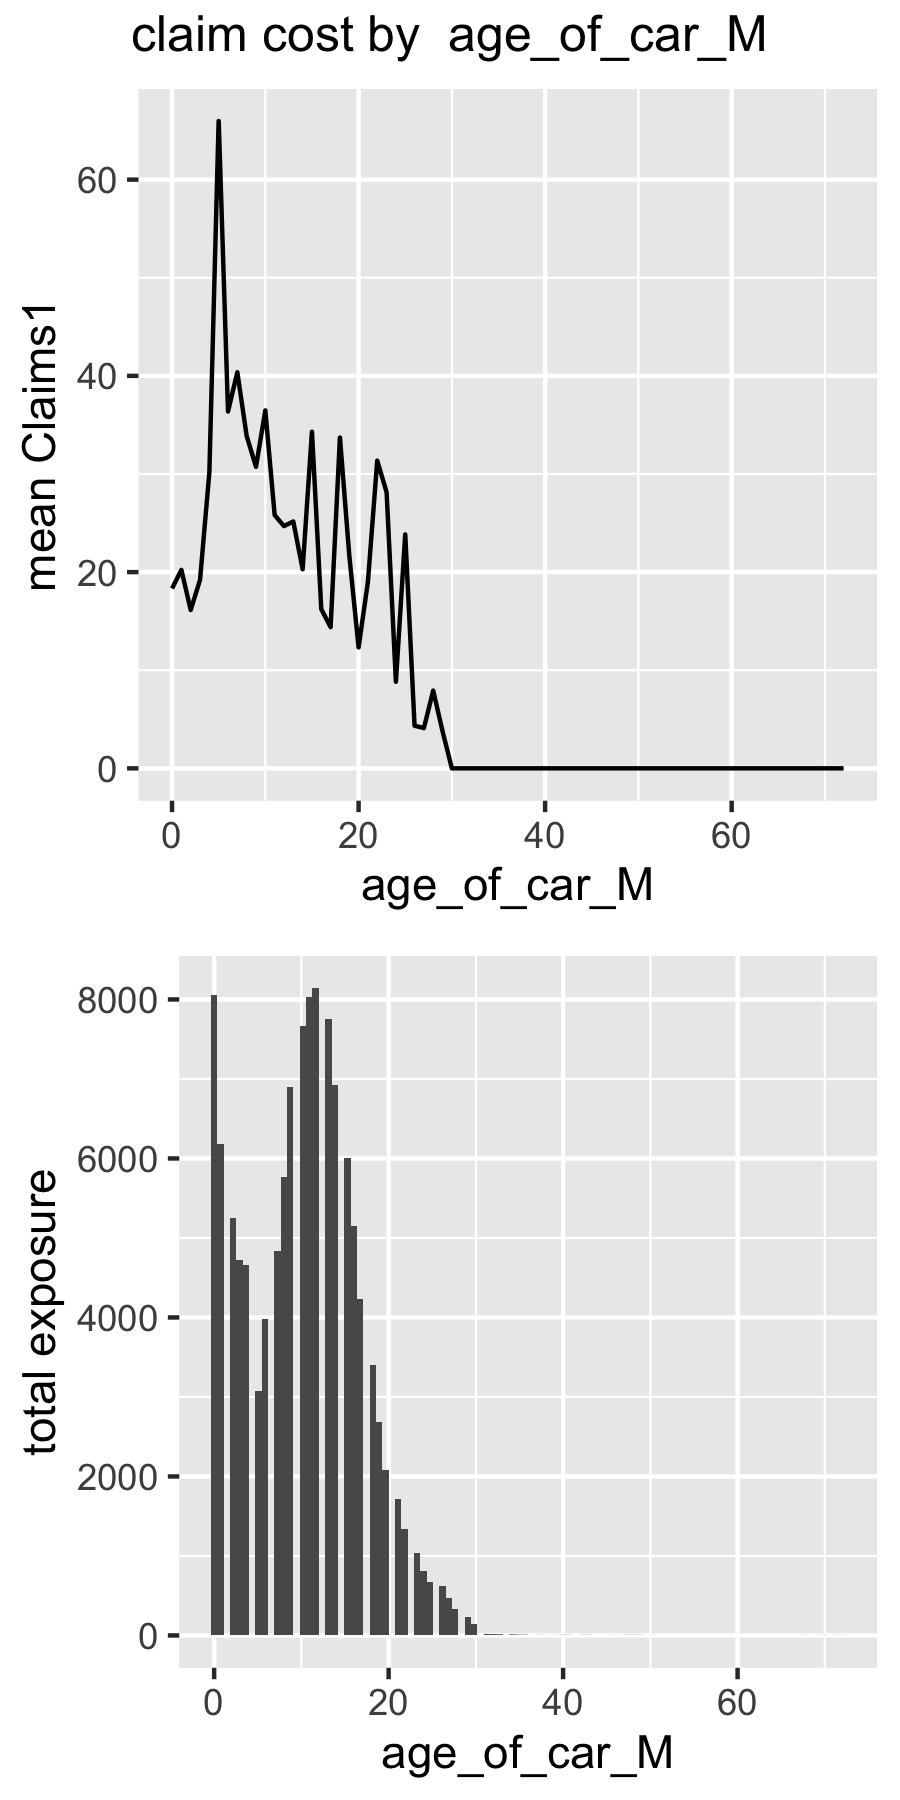

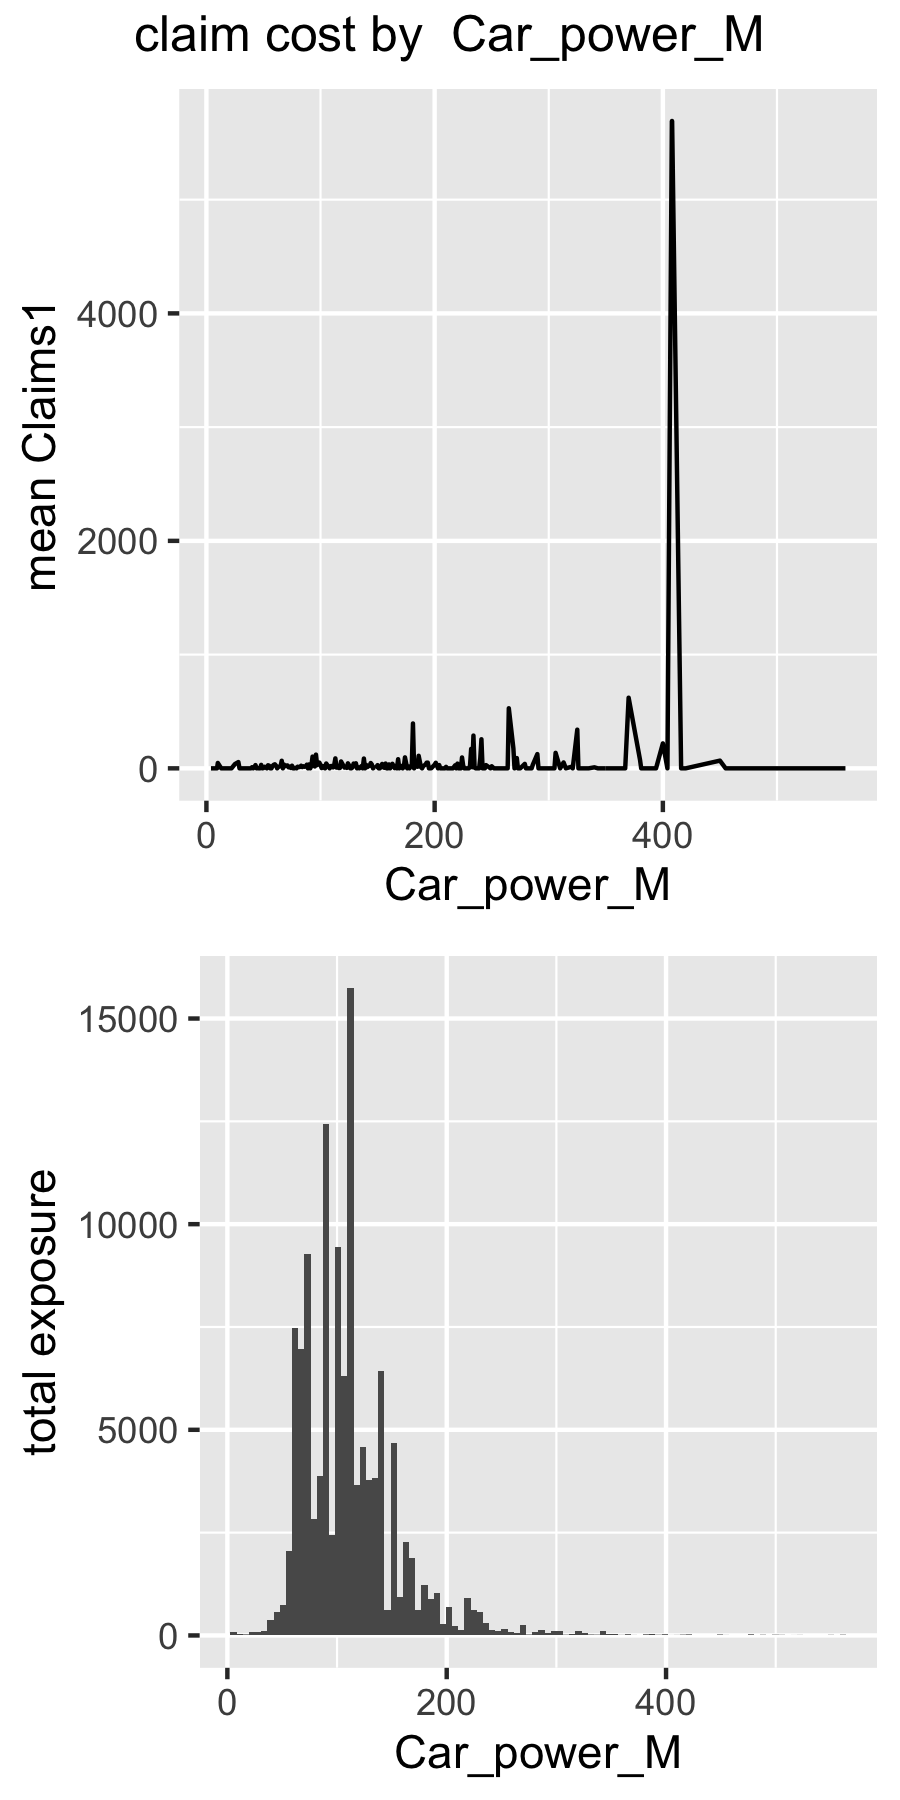

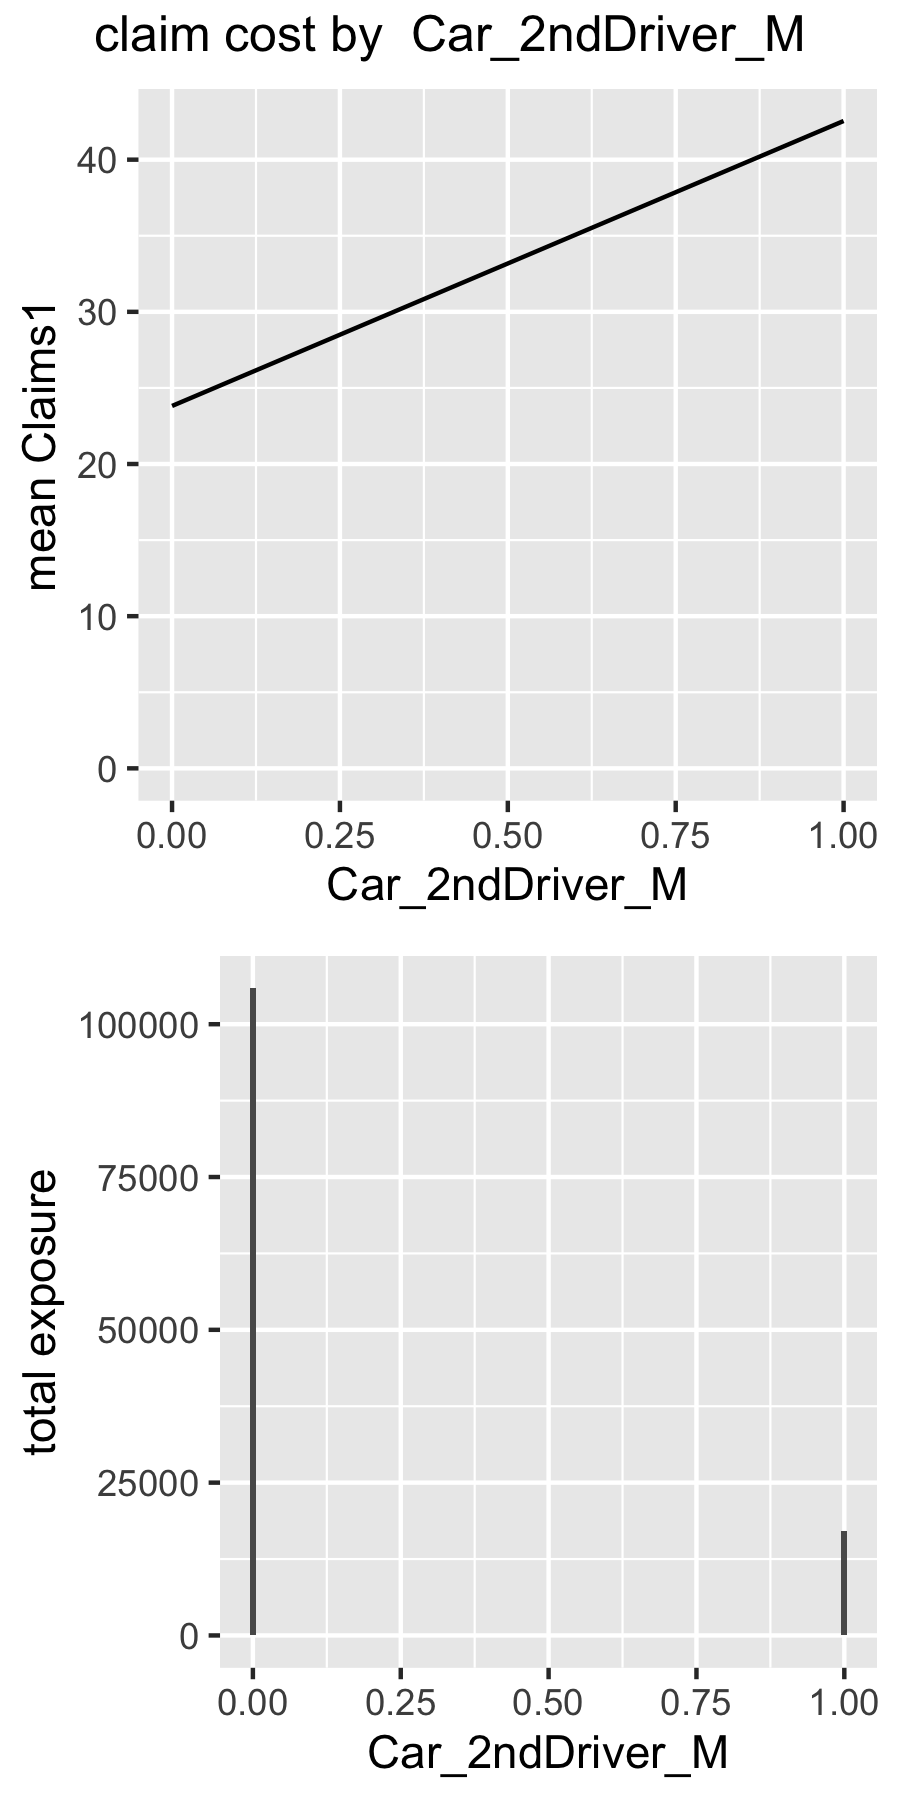

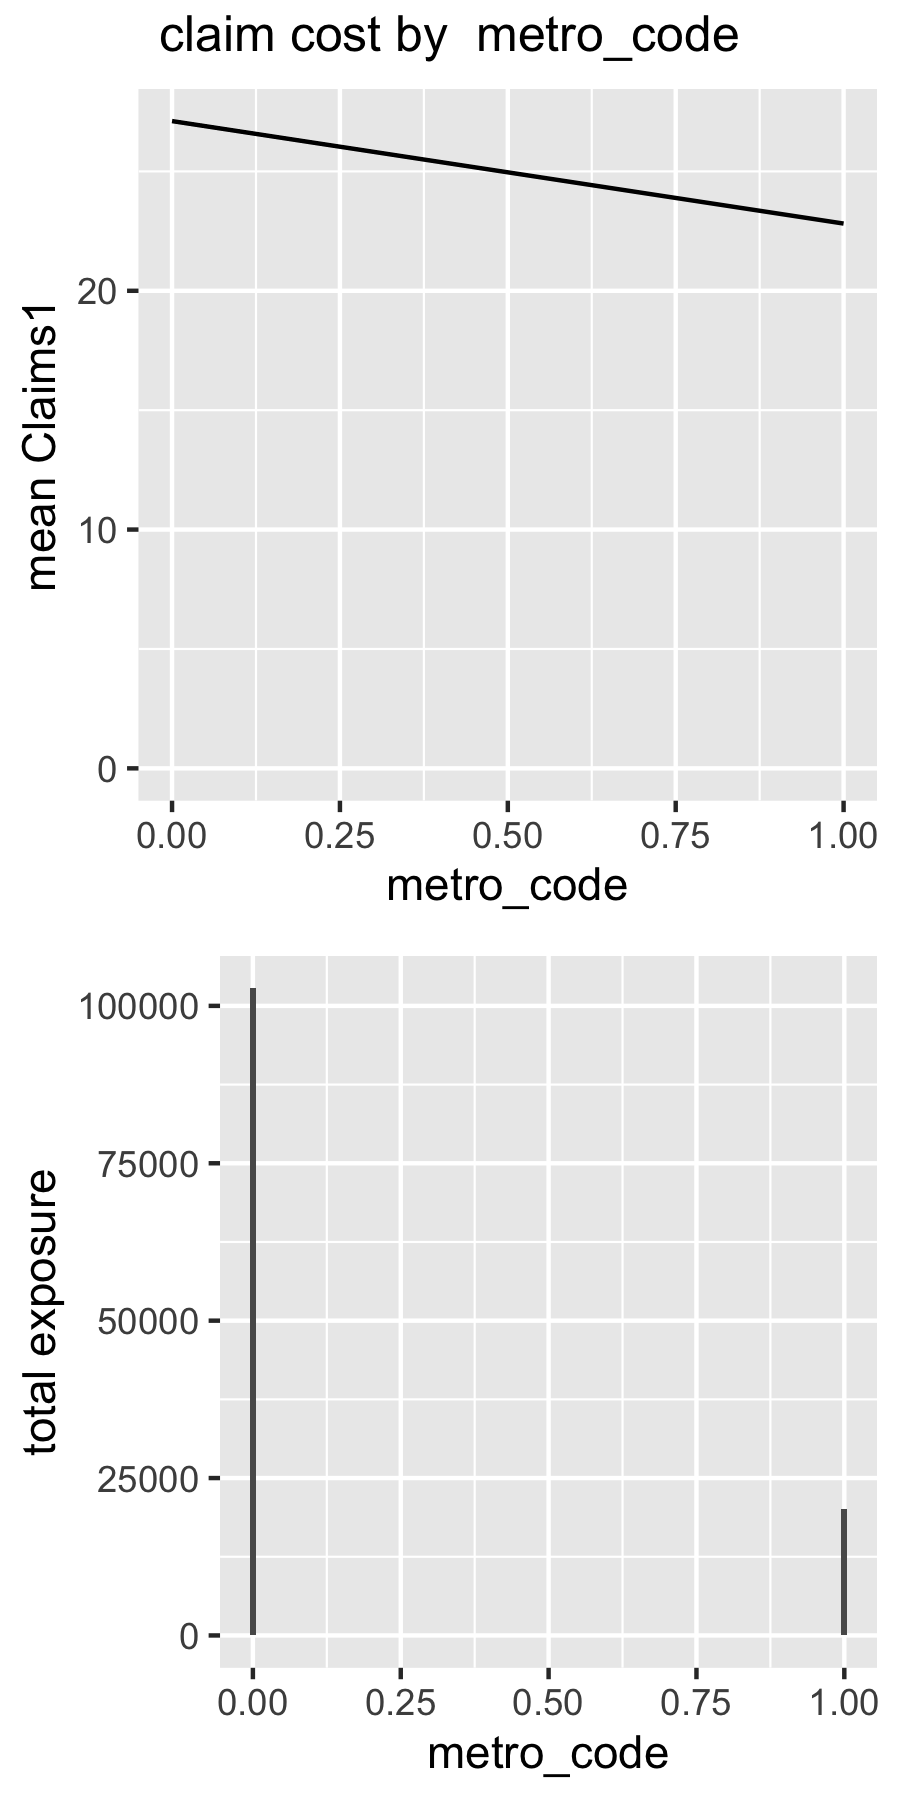

In [76]:
options(repr.plot.width=3, repr.plot.height=6, repr.plot.res = 300)
for (column_name in x){
    p_claim_cost <- visualize_barplot(df, "Claims1", column_name)
    grid.arrange(p_claim_cost[["freq"]], p_claim_cost[["exposure"]],
                 nrow=2, ncol=1, top=paste("claim cost by ", column_name))
    }